In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
import numpy as np
import scipy.misc

from my_utils import session_config, save_model, create_predictions

In [2]:
import tensorflow as tf

In [3]:
# Image Plot helper function
def plot_img(img, transformed_img, method_name, gray=False, original_gray=False):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
    #f.tight_layout()
    if original_gray:
        ax1.imshow(img,cmap='gray')
    else:
        ax1.imshow(img)
    ax1.set_title('Original Image')
    if gray:
        ax2.imshow(transformed_img, cmap='gray')
    else:
        ax2.imshow(transformed_img)
    ax2.set_title(method_name)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [18]:
image = mpimg.imread(os.path.join('data','test','315.png'))[170:522,:,:] #315.png,783.png
image_shape= image.shape
image_shape

(352, 800, 3)

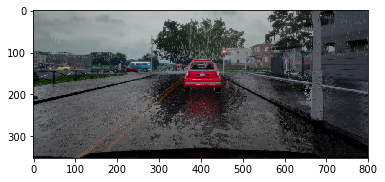

In [19]:
plt.imshow(image)

In [ ]:
class model(object):
    def __init__(self, CKPT_META_FILE, CKPT_PATH):      
        tf.train.import_meta_graph(CKPT_META_FILE)
        self.sess = tf.Session()
        saver.restore(self.sess,tf.train.latest_checkpoint(CKPT_PATH))
        self.graph = tf.get_default_graph()
        self.labels = self.graph.get_tensor_by_name("labels:0")
        self.logits_2d = self.graph.get_tensor_by_name("logits_2d:0")
        self.labels_2d = self.graph.get_tensor_by_name("labels_2d:0")
        self.loss = self.graph.get_tensor_by_name("loss:0")
        self.image_input = self.graph.get_tensor_by_name("image_input:0")
        self.keep_prob = self.graph.get_tensor_by_name("keep_prob:0")
        self.lr = self.graph.get_tensor_by_name("learning_rate:0") 

    def get_segmentation(self, image):
        with self.graph.as_default():
            # logits applied softmax result
            im_softmax = self.sess.run([tf.nn.softmax(self.logits_2d)],{self.keep_prob: 1.0, self.image_input: [image]})
            im_softmax_car  = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
            im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
            segmentation_car  = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
            segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
            mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
            mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
            mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
            mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
            street_im = scipy.misc.toimage(image)
            street_im.paste(mask_car, box=None, mask=mask_car)
            street_im.paste(mask_road, box=None, mask=mask_road)              
            
        return street_im

In [ ]:
CKPT_META_FILE = 'data/model1/model1.meta'
CKPT_PATH = 'data/model1'

In [ ]:
m = 

In [3]:
# Load the model and variable, placeholders
saver = tf.train.import_meta_graph('data/model4/model4.meta')
graph = tf.get_default_graph()
labels = graph.get_tensor_by_name("labels:0")
logits_2d = graph.get_tensor_by_name("logits_2d:0")
labels_2d = graph.get_tensor_by_name("labels_2d:0")
loss = graph.get_tensor_by_name("loss:0")
image_input = graph.get_tensor_by_name("image_input:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
lr = graph.get_tensor_by_name("learning_rate:0") 
prediction_softmax = graph.get_tensor_by_name("predictions/prediction_softmax:0") 
prediction_class = graph.get_tensor_by_name("predictions/prediction_class:0") 

In [4]:
# Load the model and variable, placeholders
sess = tf.Session(config=session_config())
saver.restore(sess,tf.train.latest_checkpoint('data/model4'))

INFO:tensorflow:Restoring parameters from data/model4/model4


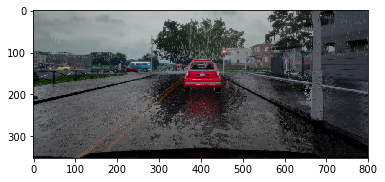

In [12]:
image = scipy.misc.imread(os.path.join('data','test','315.png'))[170:522,:,:] #315.png,783.png
plt.imshow(image)

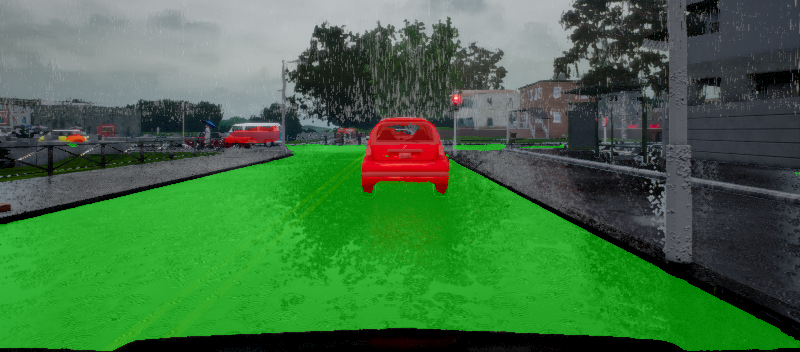

In [13]:
# logits applied softmax result
predicted_class = sess.run([prediction_class],{keep_prob: 1.0, image_input: [image]})
predicted_class = predicted_class[0]
#predicted_class = np.array(predicted_class, dtype=np.uint8)
result_im = scipy.misc.toimage(image)

segmentation_car  = predicted_class[:,0].reshape(image.shape[0], image.shape[1], 1)
segmentation_road = predicted_class[:,1].reshape(image.shape[0], image.shape[1], 1)
mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
result_im.paste(mask_car, box=None, mask=mask_car)
result_im.paste(mask_road, box=None, mask=mask_road)
result_im

In [3]:
import tensorflow as tf

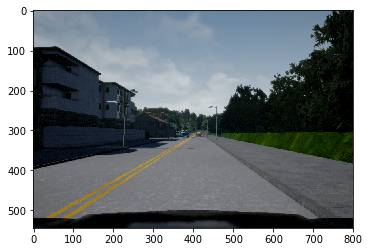

In [12]:
image = scipy.misc.imread(os.path.join('data','test','0.png'))[:544,:,:] #315.png,783.png
plt.imshow(image)

In [4]:
config = tf.ConfigProto()
jit_level = tf.OptimizerOptions.ON_2
config.graph_options.optimizer_options.global_jit_level = jit_level
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.9

SAVED_DIR = 'model4/savedmodel'
sess = tf.Session(config=config)
tf.saved_model.loader.load(sess, ['FCN8'], SAVED_DIR)
graph = tf.get_default_graph()
image_input = graph.get_tensor_by_name('image_input:0')
keep_prob = graph.get_tensor_by_name('keep_prob:0')
pred_class = graph.get_tensor_by_name('predictions/prediction_class:0')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:The specified SavedModel has no variables; no checkpoints were restored.


In [10]:
sess=tf.Session() 
signature_key = tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY
input_images = 'images'
input_kp = 'keep_prob'
output_key = 'logits'

export_path =  './savedmodel'
meta_graph_def = tf.saved_model.loader.load(
           sess,
          [tf.saved_model.tag_constants.SERVING],
          export_path)
signature = meta_graph_def.signature_def

x_tensor_name = signature[signature_key].inputs[input_images].name
kp_tensor_name = signature[signature_key].inputs[input_kp].name
y_tensor_name = signature[signature_key].outputs[output_key].name

x = sess.graph.get_tensor_by_name(x_tensor_name)
keep_prob = sess.graph.get_tensor_by_name(kp_tensor_name)
y = sess.graph.get_tensor_by_name(y_tensor_name)


INFO:tensorflow:Restoring parameters from b'./savedmodel/variables/variables'


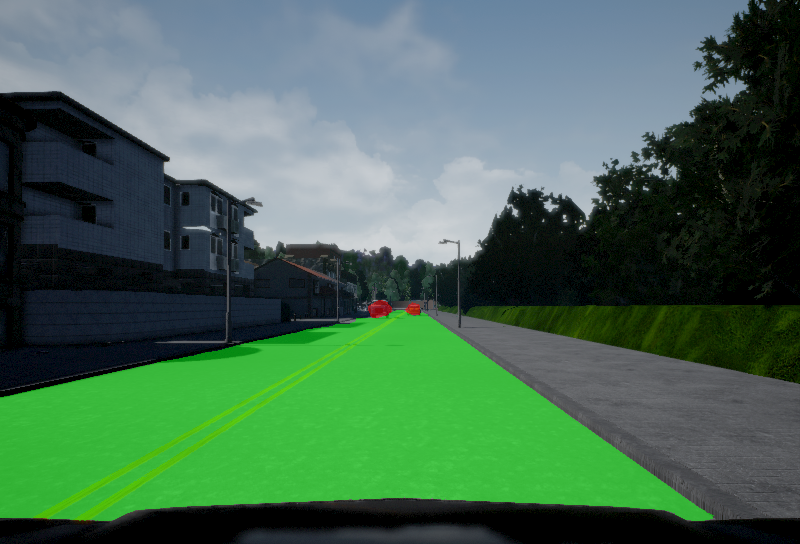

In [16]:
im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
street_im = scipy.misc.toimage(image)
street_im.paste(mask_car, box=None, mask=mask_car)
street_im.paste(mask_road, box=None, mask=mask_road)
street_im

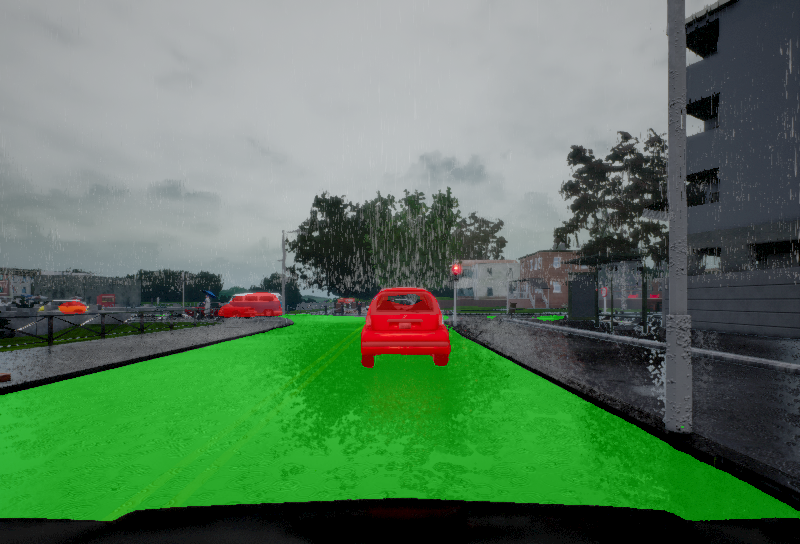

In [17]:
image = scipy.misc.imread(os.path.join('data','test','315.png'))[:544,:,:] #315.png,783.png
im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
street_im = scipy.misc.toimage(image)
street_im.paste(mask_car, box=None, mask=mask_car)
street_im.paste(mask_road, box=None, mask=mask_road)
street_im

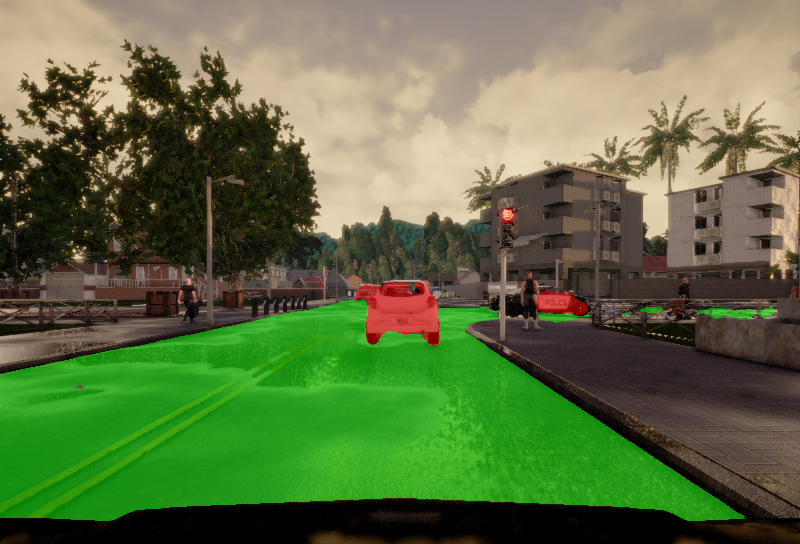

In [18]:
image = scipy.misc.imread(os.path.join('data','test','783.png'))[:544,:,:] #315.png,783.png
im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
street_im = scipy.misc.toimage(image)
street_im.paste(mask_car, box=None, mask=mask_car)
street_im.paste(mask_road, box=None, mask=mask_road)
street_im

In [3]:
# Load fronze graph
frozen_graph_filename = 'data/model1/frozen_model.pb'
with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
with tf.Graph().as_default() as graph2:
    tf.import_graph_def(graph_def)

In [4]:
# We access the input and output nodes 
x = graph2.get_tensor_by_name('import/image_input:0')
keep_prob = graph2.get_tensor_by_name('import/keep_prob:0')
y = graph2.get_tensor_by_name('import/logits_2d:0')

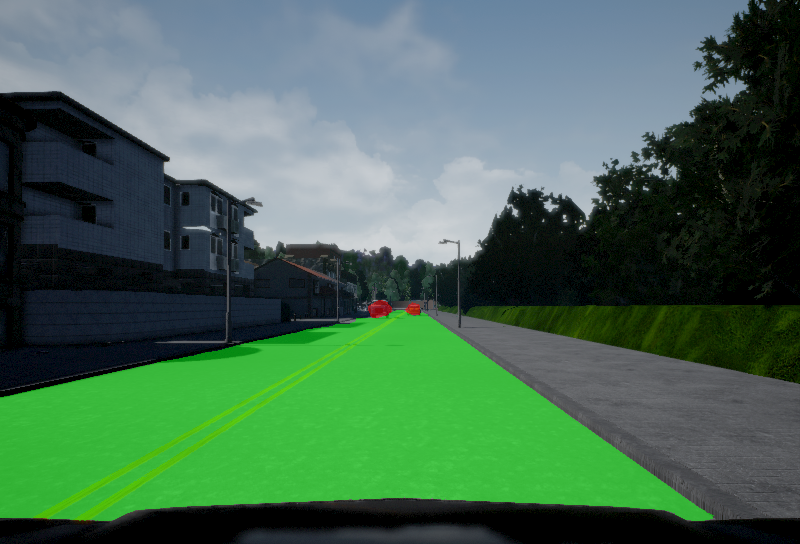

In [8]:
image = scipy.misc.imread(os.path.join('data','test','0.png'))[:544,:,:] #315.png,783.png
with tf.Session(graph=graph2) as sess:
    im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
    im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
    im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
    segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
    segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
    mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
    mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
    mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
    mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
    street_im = scipy.misc.toimage(image)
    street_im.paste(mask_car, box=None, mask=mask_car)
    street_im.paste(mask_road, box=None, mask=mask_road)
street_im    

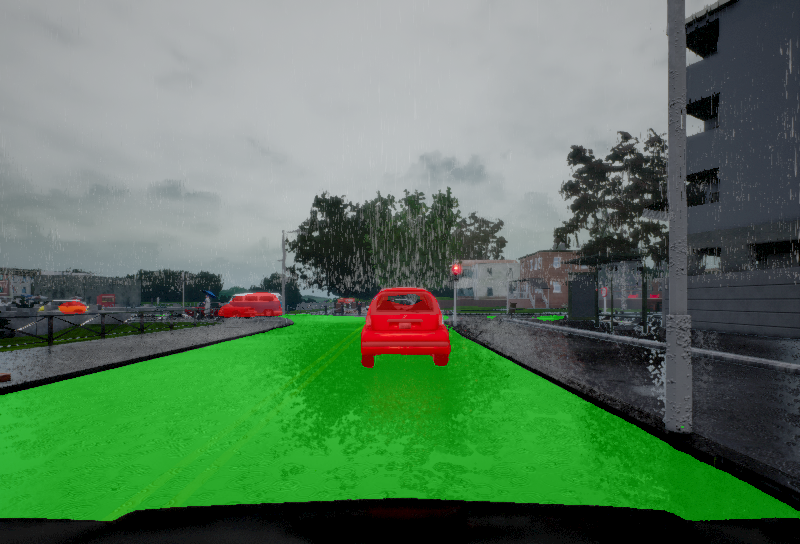

In [9]:
image = scipy.misc.imread(os.path.join('data','test','315.png'))[:544,:,:] #315.png,783.png
with tf.Session(graph=graph2) as sess:
    im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
    im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
    im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
    segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
    segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
    mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
    mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
    mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
    mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
    street_im = scipy.misc.toimage(image)
    street_im.paste(mask_car, box=None, mask=mask_car)
    street_im.paste(mask_road, box=None, mask=mask_road)
street_im    

In [3]:
# Load optimized graph
graph_file = 'optimized_graph.pb'
with tf.gfile.GFile(graph_file, "rb") as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
with tf.Graph().as_default() as graph3:
    tf.import_graph_def(graph_def)

In [4]:
# We access the input and output nodes 
x = graph3.get_tensor_by_name('import/image_input:0')
keep_prob = graph3.get_tensor_by_name('import/keep_prob:0')
y = graph3.get_tensor_by_name('import/logits_2d:0')

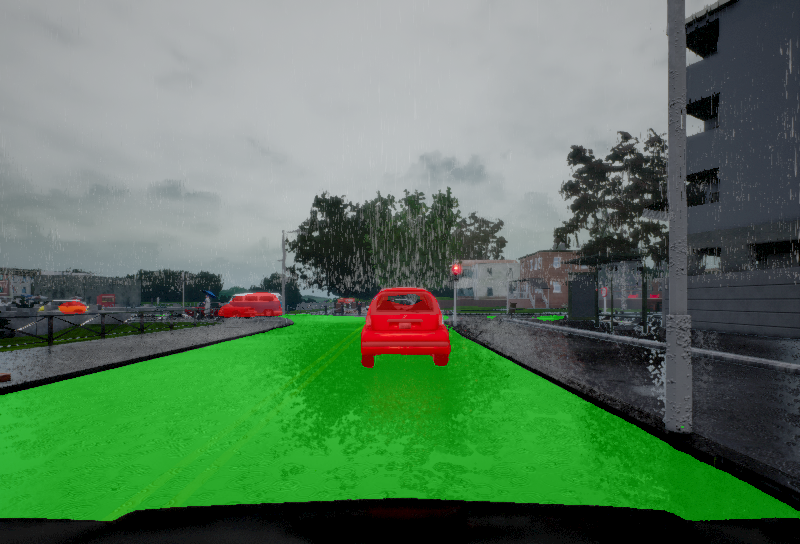

In [5]:
image = scipy.misc.imread(os.path.join('data','test','315.png'))[:544,:,:] #315.png,783.png
with tf.Session(graph=graph3) as sess:
    im_softmax  = sess.run([tf.nn.softmax(y)], {keep_prob: 1.0, x: [image]})
    im_softmax_car = im_softmax[0][:, 0].reshape(image.shape[0], image.shape[1])
    im_softmax_road = im_softmax[0][:, 1].reshape(image.shape[0], image.shape[1])
    segmentation_car = (im_softmax_car > 0.5).reshape(image.shape[0], image.shape[1], 1)
    segmentation_road = (im_softmax_road > 0.5).reshape(image.shape[0], image.shape[1], 1)
    mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
    mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
    mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
    mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
    street_im = scipy.misc.toimage(image)
    street_im.paste(mask_car, box=None, mask=mask_car)
    street_im.paste(mask_road, box=None, mask=mask_road)
street_im   